# <center> **AUTOENCODERS** </center>

_Teaching machines to learn for themselves without having to be explicitly told if everything they do is right or wrong — is the key to “true”.  [Yan Lecun, director of AI research]_

## <span style="color:red"> Outline </span>
1. [**Autoencoders: an unsupervised perspective**](#AE)
2. [**Autoecoders from DNN**](#AE_DNN)
3. [**Autoecoders from CNN**](#AE_CNN)



In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/')
print(os.getcwd())

Mounted at /content/drive
/content/drive/MyDrive/2024-2/IA2/Inteligencia Artificial -  II/ai-2-uis-student


In [ ]:
#@title **Load libraries**
#@markdown Here is important to change to GPU

import numpy as np
import sys
import matplotlib.pyplot as plt

from sklearn import datasets
import tensorflow as tf
print(tf.__version__)

2.17.0


# **1. Autoencoders: an unsupervised perspective** <a name="AE"></a>




---


The **autoencoders** learn a data representation from the **(encoder)** using **unlabeled data**  for some **(decoder)** application, such as data reduction, abnormal detection, noise reduction, and data generation,  among many others.

<center>
<img src="https://github.com/wDavid98/IA-docs/blob/main/data/AEs/autoencoders.png?raw=true" style="width:700px;heigth:100px">
</center>

Three main components are identified in autoencoders:

- **Encoder:** $(f(\mathbf{x}))$ works as a classical DNN algorithm that emulate a encoding function to obtain a latten vector.
- **Latten vector - bottleneck - embedding:** $(\mathbf{h} = f(\mathbf{x}))$ is a hidden layer that describe in special coding the input, as $\mathbf{h} = \sigma(\mathbf{Wx}+ \mathbf{b})$
- **Decoder:**, $(r = g(\mathbf{h}))$,   a decoding function to obtain an approximation of $\mathbf{{x}'}$, as $\mathbf{{x}'} = \sigma'(\mathbf{W'h}+ \mathbf{b'})$
- **Loss function:** a distance between compressed and decompressed representation, defined as
$$\left \| \mathbf{x} -\mathbf{{x}'} \right \|^{2} = \left \| \mathbf{x} - \sigma'(\mathbf{W'(\sigma(\mathbf{Wx}+ \mathbf{b}))}+ \mathbf{b'}) \right \|^{2} $$

Nowadays, these algorithms are developed with deep learning representations, and among the most know applications, we can enumerate:

1. Reduce dimensionality (Like or better than a PCA)
2. To establish hidden vectors (embeddings) to represent complex knowledge in a latent space.
3. To detect anomalies and reduce noise. It allows us to work with strongly non-balanced data.
4. Data visualization


**Go to the action!**



---



In [ ]:
#@title **Coding** Time to prepare data:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Let's do a flatten to put into a DNN autoencoder
x_train_flatten = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test_flatten = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))
print(x_train_flatten[0].shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(784,)


In [ ]:
#@title **Coding** The most simple autoencoder!

encoding_dimension = 32
input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dimension, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#@title **Coding** Train and test as usual, BUT there is something different!
opt = tf.optimizers.Adam(learning_rate = 0.01)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy')
autoencoder.fit(x_train_flatten, x_train_flatten, epochs=70,
                batch_size=256, shuffle=True,
                validation_data=(x_test_flatten, x_test_flatten))

Epoch 1/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.2455 - val_loss: 0.1303
Epoch 2/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1282 - val_loss: 0.1220
Epoch 3/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1223 - val_loss: 0.1197
Epoch 4/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1215 - val_loss: 0.1189
Epoch 5/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1203 - val_loss: 0.1186
Epoch 6/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1203 - val_loss: 0.1191
Epoch 7/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1200 - val_loss: 0.1187
Epoch 8/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1197 - val_loss: 0.1180
Epoch 9/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1195 - val_loss: 0.1177
Epoch 10/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1197 - val_loss: 0.1177
Epoch 11/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1191 - val_loss: 0.1174
Epoch 12/70
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

In [ ]:
#@title **Coding** What about if we take only the encoded part to return the latent vectors

# Encoder
encoder = tf.keras.models.Model(input_img, encoded)

#Decoder
encoded_input = tf.keras.layers.Input(shape=(encoding_dimension,))
decoder_layer = autoencoder.layers[-1]
decoder = tf.keras.models.Model(encoded_input, decoder_layer(encoded_input))

print("\n encoder model: encoder \n")
print(encoder.summary())
print(" \n decoder model: decoder \n")
print(decoder.summary())


 encoder model: encoder 



Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          25,120 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,120 (98.12 KB)

 Trainable params: 25,120 (98.12 KB)

 Non-trainable params: 0 (0.00 B)

None
 
 decoder model: decoder 



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          25,872 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,872 (101.06 KB)

 Trainable params: 25,872 (101.06 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
#@title **Coding** Let's predict the test images and also the latent vectors
encoded_imgs = encoder.predict(x_test_flatten)
predicted = autoencoder.predict(x_test_flatten)
predicted.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(10000, 784)

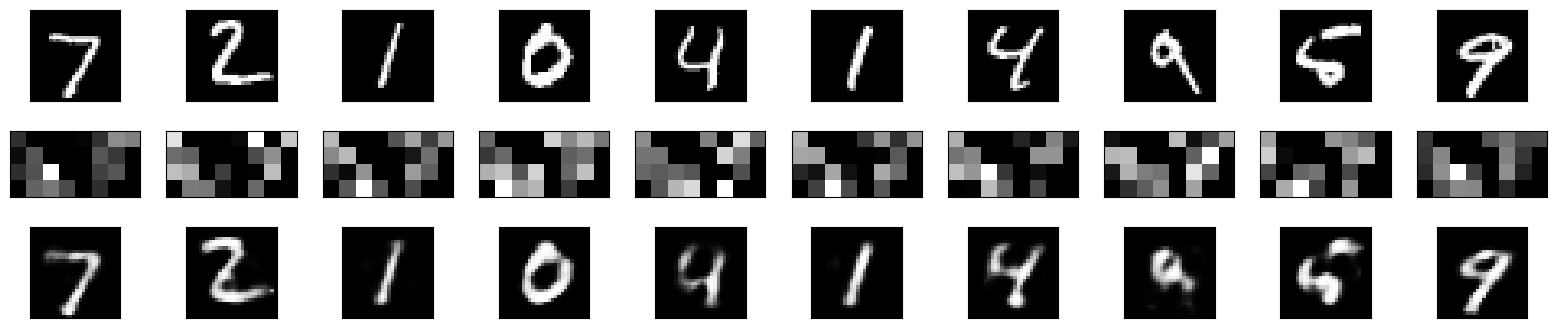

In [ ]:
#@title **Coding** Since we already have the predicted values, let's visualize the results

plt.figure(figsize=(40, 4))
for i in range(10):
    # Display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_flatten[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(4,8))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


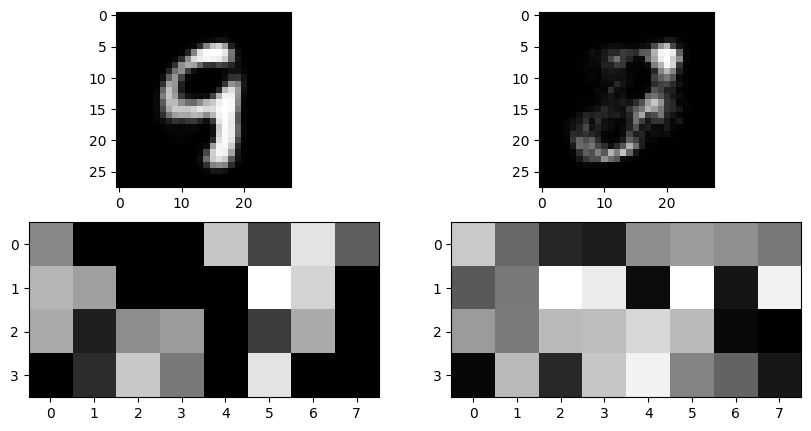

In [ ]:
#@title **Coding** evaluating random embedding vectors as latent space

index_image =  150#@param {type:"integer"}
random_index =  4#@param {type:"number"}


exp_orig = np.expand_dims(encoded_imgs[index_image], axis=0)

random_h = (np.random.random(encoded_imgs[index_image].shape))*random_index
exp_rand = np.expand_dims(random_h, axis=0)

decod_img = decoder.predict(exp_orig)
decod_rnd = decoder.predict(exp_rand)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(2, 2, 1)
ax.imshow(decod_img.reshape(28,28), cmap="gray")
ax = fig.add_subplot(2, 2, 2)
ax.imshow(decod_rnd.reshape(28,28), cmap="gray")
ax = fig.add_subplot(2, 2, 3)
ax.imshow(encoded_imgs[index_image].reshape(4,8), cmap="gray")
ax = fig.add_subplot(2, 2, 4)
ax.imshow(random_h.reshape(4,8), cmap="gray")



- Test with [`fashion_mnist`](https://https://keras.io/api/datasets/fashion_mnist/) dataset
- Change the optimizer and evaluate performance
- Now, build a larger DNN with additional hidden layers and report the results.

In [ ]:
#@title **Solution** Load the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Normalizing
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Let's do a flatten to put into a DNN autoencoder
x_train_flatten = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test_flatten = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))
print(x_train_flatten[0].shape)

# Optimizator and fit the data
opt = tf.optimizers.Adam(learning_rate = 0.01)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy')
autoencoder.fit(x_train_flatten, x_train_flatten, epochs=70,
                batch_size=256, shuffle=True, verbose=0,
                validation_data=(x_test_flatten, x_test_flatten))

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
(784,)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


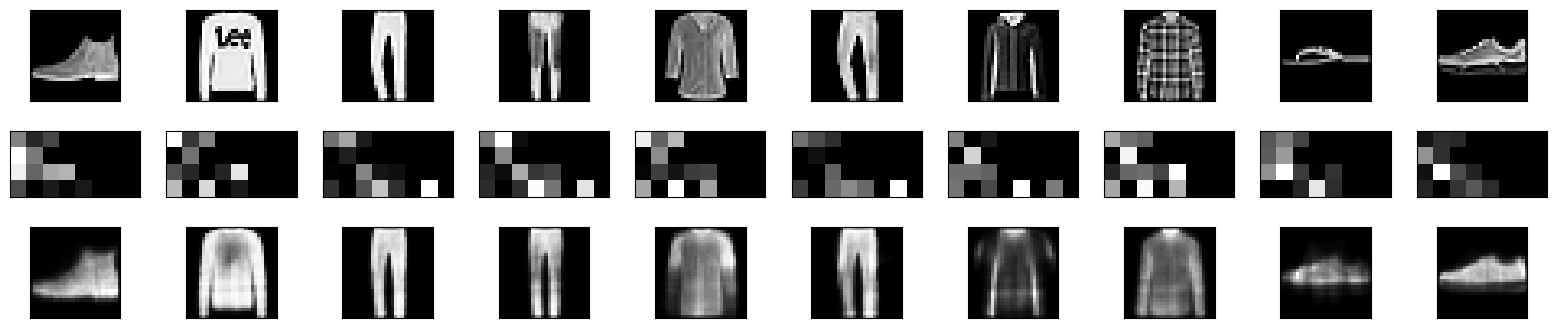

In [ ]:
#@title **Solution** predict and visualize over fashion

encoded_imgs = encoder.predict(x_test_flatten)
predicted = autoencoder.predict(x_test_flatten)

# Visualize the results
plt.figure(figsize=(40, 4))
for i in range(10):
    # Display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_flatten[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(4,8))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # Display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [ ]:
#@title **Solution**

input_img = tf.keras.layers.Input(shape=(784,))
encoded = tf.keras.layers.Dense(256, activation='relu')(input_img)
encoded = tf.keras.layers.Dense(128, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
encoded = tf.keras.layers.Dense(32, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(64, activation='relu')(encoded)
decoded = tf.keras.layers.Dense(128, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(256, activation='relu')(decoded)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(decoded)
autoencoder = tf.keras.models.Model(input_img, decoded)

autoencoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 784)                 │         201,488 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 489,136 (1.87 MB)

 Trainable params: 489,136 (1.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#@title **Coding** Train and test as usual
opt = tf.optimizers.Adam(learning_rate = 0.01)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy')
autoencoder.fit(x_train_flatten, x_train_flatten, epochs=100,
                batch_size=256, shuffle=True,
                validation_data=(x_test_flatten, x_test_flatten))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.4232 - val_loss: 0.3165
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3106 - val_loss: 0.3067
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3037 - val_loss: 0.3011
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2981 - val_loss: 0.3009
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2966 - val_loss: 0.2958
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2928 - val_loss: 0.2942
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2922 - val_loss: 0.2927
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.2900 - val_loss: 0.2925
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2890 - val_loss: 0.2919
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2891 - val_loss: 0.2905
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2875 - val_loss: 0.2903
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━━

In [ ]:
#@title **Coding** Take only the encoded part to return latent vectors

# Encoder
encoder = tf.keras.models.Model(input_img, encoded)

encoded_imgs = encoder.predict(x_test_flatten)
predicted = autoencoder.predict(x_test_flatten)
predicted.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


(10000, 784)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


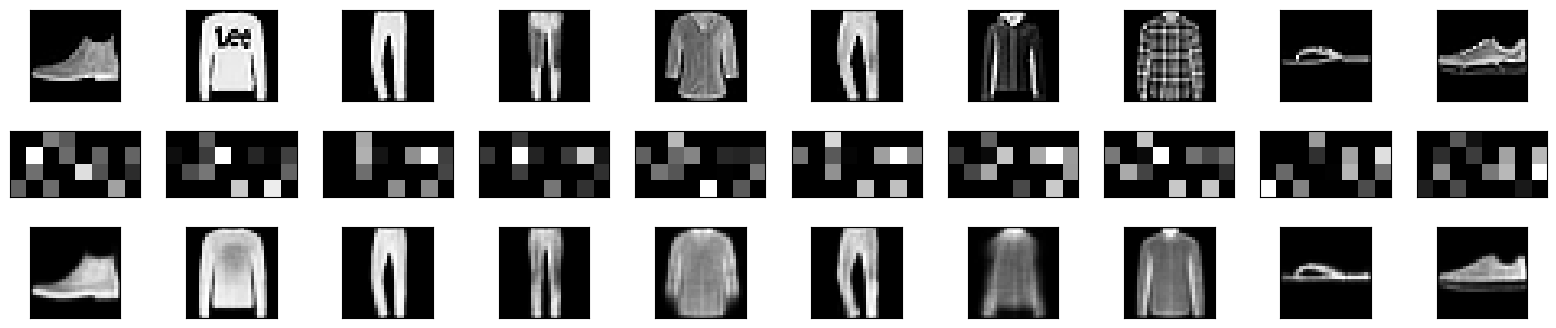

In [ ]:
#@title **Coding** predict and visualize over fashion

encoded_imgs = encoder.predict(x_test_flatten)
predicted = autoencoder.predict(x_test_flatten)


# Visualize the results
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_flatten[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(4,8))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# **2. Anomaly detection Autoencoders from DNN**  <a name="AE_DNN"></a>


One of the main tasks solved for autoencoders is **anomaly detection** which consists on detect **NON-COMMON PATTERNS** from a know distribution of data representation.

To prove the effectiveness of autoencoders we will try to solve the problem of detecting **FRAUD bank transactions** over a European credit card transaction dataset. The dataset has **284807 normal transactions** and **492 fraudulent transactions** taken from two consecutive days.

The dataset is available in Kaggle and for confidential concerns, the features were previously mapped to a endoded representation used principal component analysis (PCA).

**The idea:** is to detect fraud transactions.

**Go to the action!**



In [ ]:
#@title **Coding** Load and explore data
import pandas as pd
datos = pd.read_csv("https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/data/creditcard.csv")


datos

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
#@title **Coding** How many values of each class do we have?
nr_classes = datos['Class'].value_counts(sort=True)
print("Strongly unbalanced dataset!")
print(nr_classes)

Strongly unbalanced dataset!
Class
0    284315
1       492
Name: count, dtype: int64


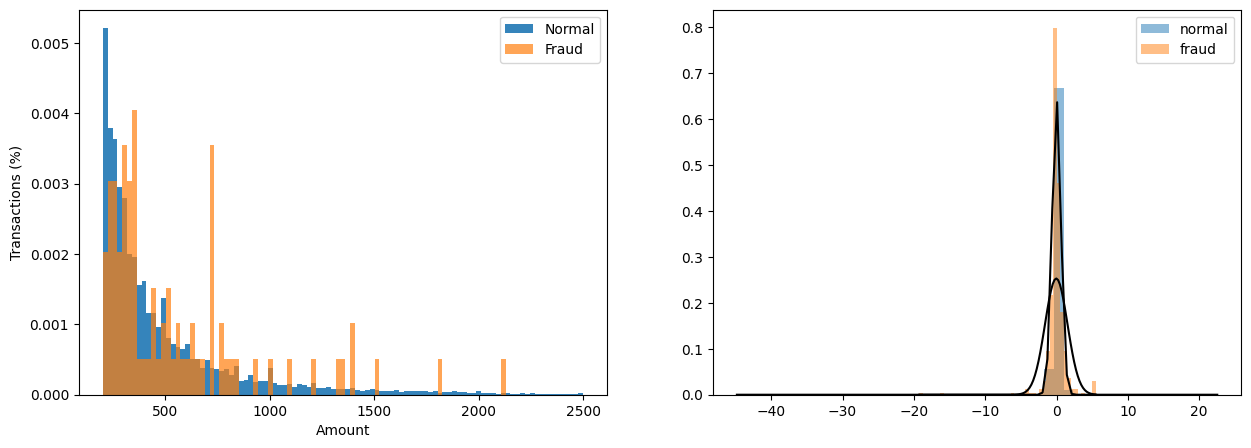

In [ ]:
#@title **Coding** It is a really complex problem!
#@markdown **Transaction distribution and feature distribution among classes**
#@markdown Features among V1-V28

feature = "V23" #@param {type:"string"}

import scipy.stats as stats

normal_v = datos[feature][datos.Class == 0]
fraud_v  = datos[feature][datos.Class == 1]
d_normal = stats.norm(loc=np.mean(normal_v), scale=np.std(normal_v))
d_fraud = stats.norm(loc=np.mean(fraud_v), scale=np.std(fraud_v))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1, 2, 1)

bins = np.linspace(200, 2500, 100)
ax = plt.hist(datos[datos.Class == 0].Amount, bins, density=True, alpha=0.9,  label='Normal')
ax = plt.hist(datos[datos.Class == 1].Amount, bins, density=True,alpha=0.7,  label='Fraud')
ax = plt.legend(loc='upper right')
ax = plt.xlabel("Amount")
ax = plt.ylabel("Transactions (%)");

ax = fig.add_subplot(1, 2, 2)
ax = plt.hist(normal_v, bins=50, density=True, alpha=.5, label="normal");
ax = plt.hist(fraud_v, bins=50, density=True, alpha=.5, label="fraud");
t_normal = np.linspace(np.min(normal_v), np.max(normal_v), 100)
t_fraud = np.linspace(np.min(fraud_v), np.max(fraud_v), 100)
ax = plt.plot(t_normal, d_normal.pdf(t_normal), c='black')
ax = plt.plot(t_fraud, d_fraud.pdf(t_fraud), c='black')
ax = plt.legend(loc='upper right')

In [ ]:
#@title **Coding** We should prepare the dataset
#@markdown **we remove non-important columns**
#@markdown and normalize "amount" to be in same range as PCA features

from sklearn.preprocessing import StandardScaler
datos.drop(['Time'], axis=1, inplace=True)
datos['Amount'] = StandardScaler().fit_transform(datos['Amount'].values.reshape(-1,1))

from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(datos, test_size=0.2, random_state=42)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
X_train = X_train.values

Y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_test = X_test.values
print(X_train.shape, X_test.shape, Y_test.shape)

(227451, 29) (56962, 29) (56962,)


In [ ]:
#@title **Coding** Only train normal transactions!

#@markdown **The autoencoder learn only conventional things and will generate alarms for abnormal transactions**
#@markdown Now, we train the abnormal detection autoencoder

dim_entrada = X_train.shape[1]
input_layer = tf.keras.layers.Input(shape=(dim_entrada,))

encoder = tf.keras.layers.Dense(20, activation='tanh')(input_layer)
encoder = tf.keras.layers.Dense(14, activation='relu')(encoder)

decoder = tf.keras.layers.Dense(20, activation='tanh')(embedding)
decoder = tf.keras.layers.Dense(29, activation='relu')(decoder)


autoencoder_ad = tf.keras.models.Model(inputs=input_layer, outputs=decoder)

from keras.optimizers import SGD
sgd = tf.optimizers.SGD(learning_rate=0.01)
autoencoder_ad.compile(optimizer=sgd, loss='mse')

autoencoder_ad.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, validation_data=(X_test,X_test), verbose=1)



Epoch 1/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 1.0013 - val_loss: 0.9126
Epoch 2/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.8599 - val_loss: 0.8360
Epoch 3/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 0.8324 - val_loss: 0.8090
Epoch 4/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.7667 - val_loss: 0.7809
Epoch 5/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.7306 - val_loss: 0.7603
Epoch 6/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.7578 - val_loss: 0.7420
Epoch 7/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.6944 - val_loss: 0.7301
Epoch 8/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 0.7034 - val_loss: 0.7202
Epoch 9/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.6885 - val_loss: 0.7124
Epoch 10/10
7108/7108 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - loss: 0.6720 - val_loss: 0.7068


In [ ]:
#@title **Coding** Save and load your model according to your work

from tensorflow.keras.losses import MeanSquaredError
mse = MeanSquaredError()

autoencoder_ad.save('models/autoendoder_ad_100.h5')
autoencoder_ad = tf.keras.models.load_model('models/autoendoder_ad_100.h5', custom_objects={'mse': mse})
autoencoder_ad.summary()


#Decoder
encoded_input = tf.keras.layers.Input(shape=(14,))
decoder_layer = autoencoder_ad.layers[-2]
decoder = tf.keras.models.Model(encoded_input, decoder_layer(encoded_input))

print(" \n decoder model: decoder \n")
print(decoder.summary())

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 29)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 20)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 14)                  │             294 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 20)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 29)                  │             609 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,805 (7.05 KB)

 Trainable params: 1,803 (7.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

 
 decoder model: decoder 



Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 14)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 20)                  │             300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 300 (1.17 KB)

 Trainable params: 300 (1.17 KB)

 Non-trainable params: 0 (0.00 B)

None


### **Precision vs Recall**

Since we have **unbalanced data** and we focus on detect **fraud** transaction, we need to categorize fraud and normal transactions, as:

- **_TP_**: fraud detected as fraud
- **_TN_**: normal detected as normal
- **_FN_**: fraud detected as normal
- **_FP_**: normal detected as fraud

Then, metrics that five more information are:

- **Precision:** ($\frac{TP}{TP+ FP}$)  proportion of correct fraud detections w.r.t all fraud detections. In other terms, this measure estimates the probability that a randomly sample will be relevant (TP)


- **Recall:** ($\frac{TP}{TP+ FN}$)  the proportion of correct fraud detections with respect to all fraud samples. In other terms, this measure the estimated probability that a random sample will be properly selected.

[from wiki]

<center>
<img src="https://github.com/wDavid98/IA-docs/blob/main/data/AEs/Precisionrecall.png?raw=true" style="width:700px;heigth:100px"></center>

Now, to apply in our problem we need:

1. Predict values
2. compute error with real values
3. A threshold with respect to reconstruction
4. Define if it is a fraud.

In [ ]:
#@title **Coding** predict fraud and normal transactions for test
X_pred = autoencoder_ad.predict(X_test)
ecm = np.mean(np.power(X_test-X_pred,2), axis=1)
print(X_pred.shape)
print(X_pred)

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
(56962, 29)
[[0.         1.2661848  0.         ... 0.         0.         0.7478618 ]
 [0.6855358  0.         0.02951553 ... 0.         0.08463517 1.4982185 ]
 [1.1048758  0.         0.07848692 ... 0.         0.         0.        ]
 ...
 [0.         0.23872417 0.         ... 0.         0.         0.        ]
 [0.         0.94244754 1.4293119  ... 0.         0.         0.        ]
 [0.         0.571538   0.         ... 0.         0.         3.350214  ]]


If we pass a fraud transaction the reconstruction will be bad or almost worse than a reconstruction from a conventional transaction.

(56265,)
[3.66421974e-02 4.26128441e-02 4.38828484e-02 ... 1.69070317e+02
 1.97745996e+02 2.57227863e+02]


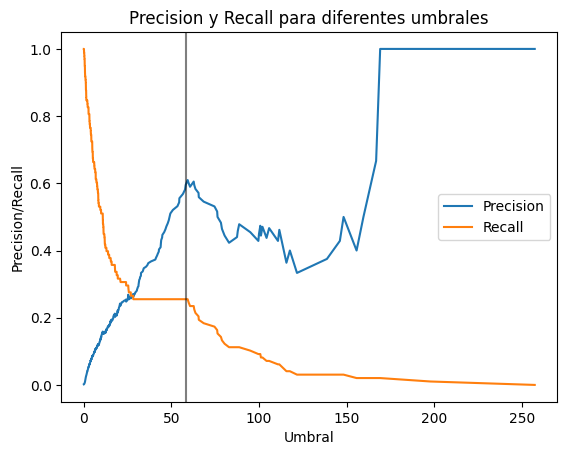

[[56847    17]
 [   73    25]]
25
Precision:  0.5952380952380952
Recall:  0.25510204081632654


In [ ]:
#@title **Coding** We can plot the precision and recall to decide the threshold}


threshold_pr = 58.19 #@param {type:"slider", min:0, max:250, step:0.01}


from sklearn.metrics import confusion_matrix, precision_recall_curve
precision, recall, umbral = precision_recall_curve(Y_test, ecm)

print(umbral.shape)
print(umbral)
plt.plot(umbral, precision[1:], label="Precision")
plt.plot(umbral, recall[1:], label="Recall")
plt.axvline(threshold_pr, color="black", alpha=0.5)
plt.title('Precision y Recall para diferentes umbrales')
plt.xlabel('Umbral')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()


threshold_fix = threshold_pr
Y_pred = [1 if e > threshold_fix else 0 for e in ecm]

conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

print(conf_matrix[1][1])

Prec =  conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[0][1])
Rec = conf_matrix[1][1]/(conf_matrix[1][1]+conf_matrix[1][0])

print("Precision: ", Prec)
print("Recall: ", Rec)

0.6274015409483996


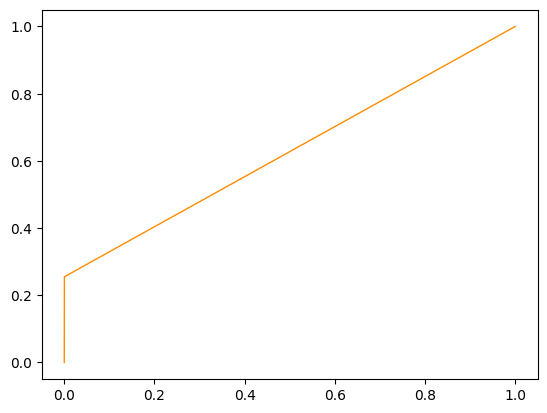

In [ ]:
#@title **Coding** the AUC roc curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)
print(roc_auc)
plt.plot(fpr, tpr, color='darkorange',lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc?hl=es-419

https://polmartisanahuja.com/entendiendo-la-curva-roc-y-el-auc-dos-medidas-del-rendimiento-de-un-clasificador-binario-que-van-de-la-mano/

- Change the optimizer and architecture. Is it better with some other configuration?

- Evaluate the performance with a model saved in course with 100 epochs.

-  Create a decoder model and pass random latent vectors. How robust is the proposed approach?


# **3. Autoencoders from CNN** <a name="AE_CNN"></a>


We can take advantage of convolutions to obtain more robust representation of image data. In this case, we use as usual `Conv2D`, and `MaxPooling2D`. We can also use dropout and other tricks to obtain a representation.

- Regarding decoder, we use the `UpSampling2D` layer that is.

In [ ]:
#@title **Coding** To preare data for CNN
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Normalize
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train_d = np.expand_dims(x_train, axis=3)
x_test_d = np.expand_dims(x_test, axis=3)
print("One sample: ", x_train_d[0].shape)
print(x_train_d.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
One sample:  (28, 28, 1)
(60000, 28, 28, 1)


In [ ]:
#@title **Coding** Autoencoder CNN implementation

input_img = tf.keras.layers.Input(shape=(28, 28, 1) )
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x) #  (4, 4, 8)  128-dimensional

#@markdown In this case, we have a 128 dimensional de hidden embedding vector

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_cnn = tf.keras.models.Model(input_img, decoded)

autoencoder_cnn.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 14, 14, 8)           │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 7, 7, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 4, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_6 (UpSampling2D)       │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 8, 8, 8)             │             584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_7 (UpSampling2D)       │ (None, 16, 16, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_8 (UpSampling2D)       │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 28, 28, 1)           │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,385 (17.13 KB)

 Trainable params: 4,385 (17.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#@title **Coding** Train and test as usual
opt = tf.optimizers.Adam(learning_rate = 0.01)
autoencoder_cnn.compile(optimizer=opt, loss='binary_crossentropy')
autoencoder_cnn.fit(x_train_d, x_train_d, epochs=100,
                batch_size=256, shuffle=True,
                validation_data=(x_test_d, x_test_d))

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - loss: 0.2810 - val_loss: 0.1474
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1411 - val_loss: 0.1292
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1287 - val_loss: 0.1223
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1220 - val_loss: 0.1177
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1178 - val_loss: 0.1170
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1151 - val_loss: 0.1119
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1135 - val_loss: 0.1097
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1120 - val_loss: 0.1092
Epoch 9/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.1104 - val_loss: 0.1082
Epoch 10/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.1095 - val_loss: 0.1152
Epoch 11/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1105 - val_loss: 0.1064
Epoch 12/100
235/235 ━━━━━━━━━━━━━━━━━━

In [ ]:
#@title **Coding** We only take the encoded part to return latent vectors

# Encoder
encoder = tf.keras.models.Model(input_img, encoded)

encoded_imgs = encoder.predict(x_test_d)
predicted = autoencoder_cnn.predict(x_test_d)
predicted.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


(10000, 28, 28, 1)

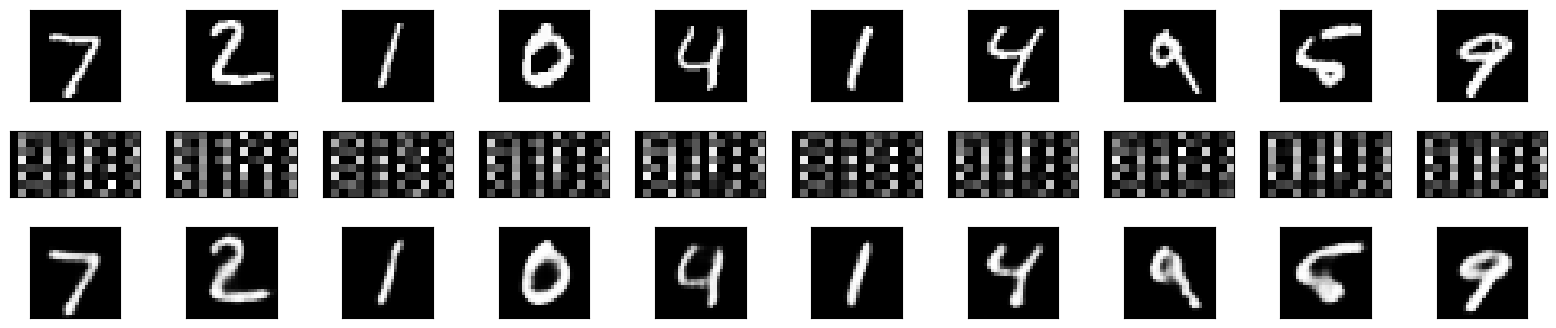

In [ ]:
#@title **Coding** Visualize the results
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_d[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display encoded image
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(encoded_imgs[i].reshape(8,16))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


-  Try a CNN autoencoder for `cifar-10`
-  Ilustrate the obtained results



In [ ]:
#@title **Professor solution** CIFAR 10
#markdown 64,32, 16 -> 16,32,64
#@markdown uses batchnormalization
(x_train_cf, y_train_cf), (x_test_cf, y_test_cf) = tf.keras.datasets.cifar10.load_data()
x_train_cf = x_train_cf.astype('float32') / 255
x_test_cf = x_test_cf.astype('float32') / 255

#x_train_cf = np.expand_dims(x_train_cf, axis=4)
#x_test_cf = np.expand_dims(x_test_cf, axis=4)

#x_train = x_train.reshape([-1, 32, 32, 3])
#x_test = x_test.reshape([-1, 32, 32, 3])
print("one sample: ", x_train_cf[0].shape)
print(x_train_cf.shape)

print ("CIFAR 10")
print (x_train_cf.shape, y_train_cf.shape, x_test_cf.shape, y_test_cf.shape)



input_img = tf.keras.layers.Input(shape=(32, 32, 3) )
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)
decoded = tf.keras.layers.BatchNormalization()(x)


autoencoder_cnn = tf.keras.models.Model(input_img, decoded)

autoencoder_cnn.summary()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
one sample:  (32, 32, 3)
(50000, 32, 32, 3)
CIFAR 10
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 8, 8, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 4, 4, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_9 (UpSampling2D)       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 8, 8, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_10 (UpSampling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 52,975 (206.93 KB)

 Trainable params: 52,521 (205.16 KB)

 Non-trainable params: 454 (1.77 KB)

In [ ]:
#@title ****Professor solution**** train and test as usual
opt = tf.optimizers.Adam()
autoencoder_cnn.compile(optimizer=opt, loss='binary_crossentropy')
autoencoder_cnn.fit(x_train_cf, x_train_cf, epochs=100,
                batch_size=32, shuffle=True,verbose=1)

Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 1.6469
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - loss: 0.7114
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.6575
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.6183
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.6054
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.5933
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.5875
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.5902
Epoch 9/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.5834
Epoch 10/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.5814
Epoch 11/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.5809
Epoch 12/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.5791
Epoch 13/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.5790
Epoch 14/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.5838
Epoch 15/

In [ ]:
#@title **Professor solution** take only the encoded part to return latent vectors

# Encoder
encoder = tf.keras.models.Model(input_img, encoded)

encoded_imgs = autoencoder_cnn.predict(x_test_cf)
predicted = autoencoder_cnn.predict(x_test_cf)
predicted.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


(10000, 32, 32, 3)

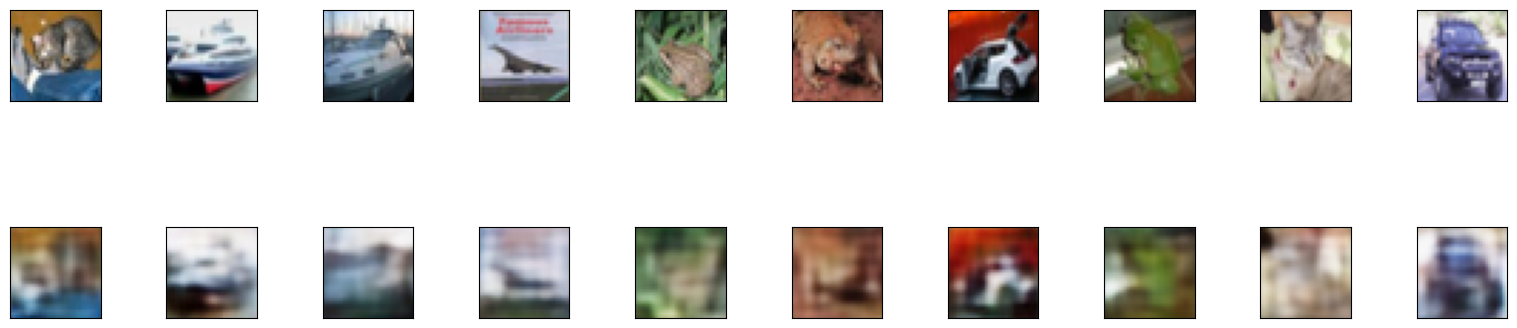

In [ ]:
#@title **Professor solution** predict and visualize over cifar

#@title **code** visualize the results
plt.figure(figsize=(40, 4))
for i in range(10):
    # display original
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(x_test_cf[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(32, 32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

## **Some conclusions**

- The autoencoders represent a unsupervised way to tacke many different problems such as noise reduction, abnormal detection, among much others.

- Today, there exist many other variants such variational autoencoders, generative models among others.

- A main feature of autoencoders is the hidden vector representation, which among others allows to show structure of data in a latent space.



## **References**

[1. Reducing the dimensionality of data with neural networks](https://dbirman.github.io/learn/hierarchy/pdfs/Hinton2006.pdf)

[2. Autoencoders from deeplearningbook](https://www.deeplearningbook.org/contents/autoencoders.html)

